In [54]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/loay/desktop/career resources/Data for projects/Loan default and payment/loan_train.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.size

3460

In [5]:
df.shape

(346, 10)

In [6]:
df.describe

<bound method NDFrame.describe of      Unnamed: 0  Unnamed: 0.1 loan_status  Principal  terms effective_date  \
0             0             0     PAIDOFF       1000     30       9/8/2016   
1             2             2     PAIDOFF       1000     30       9/8/2016   
2             3             3     PAIDOFF       1000     15       9/8/2016   
3             4             4     PAIDOFF       1000     30       9/9/2016   
4             6             6     PAIDOFF       1000     30       9/9/2016   
..          ...           ...         ...        ...    ...            ...   
341         394           394  COLLECTION        800     15      9/11/2016   
342         395           395  COLLECTION       1000     30      9/11/2016   
343         397           397  COLLECTION        800     15      9/12/2016   
344         398           398  COLLECTION       1000     30      9/12/2016   
345         399           399  COLLECTION       1000     30      9/12/2016   

       due_date  age         

# Datetime conversion
To work with dates as date objects, see the difference betn the date format before and after conversion (remeber esc then m to markdown and esc then y to code

In [29]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

# Status of the loans: Data visualization
how many loans are paid and how many are defaulted (collection)

In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [6]:
import seaborn as sns

In [14]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
plt.show()

In [4]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

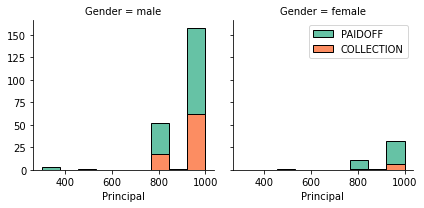

In [24]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
graph = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2",col_wrap=2) #col_wrap=2
graph.map(plt.hist, 'Principal', bins=bins, ec="k")
graph.axes[1].legend()
plt.show()

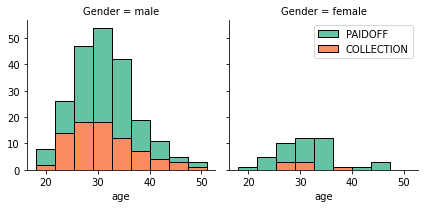

In [27]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
graph = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'age', bins=bins, ec="k")

graph.axes[1].legend()
plt.show()

# Feature selection

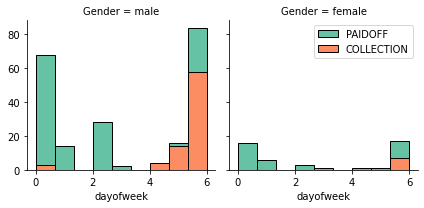

In [37]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [38]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [ ]:
# Categorial variables to numerical

In [44]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [52]:
df['Gender'].replace(['male,female'], value=[0,1], inplace=True)

ValueError: Replacement lists must match in length. Expecting 1 got 2 

In [53]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [55]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [57]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [58]:

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [59]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [60]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [61]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [62]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [63]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [64]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
k = 6
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=6)

In [68]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [69]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8043478260869565
Test set Accuracy:  0.7142857142857143


In [71]:
from sklearn.metrics import jaccard_similarity_score

ImportError: cannot import name 'jaccard_similarity_score' from 'sklearn.metrics' (/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [72]:
jaccard_similarity_score(y_test, yhat)

NameError: name 'jaccard_similarity_score' is not defined

In [73]:
from sklearn.metrics import jaccard_score

In [76]:
jaccard_score(y_test, yhat)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1254: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['COLLECTION', 'PAIDOFF'], dtype='<U10')

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
df[0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [81]:
X = df[['loan_status', 'Principal', 'terms', 'effective_date', 'due_date', 'age', 'education', 'Gender']].values
X[0:7]

array([['PAIDOFF', 1000, 30, Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-10-07 00:00:00'), 45, 'High School or Below', 0],
       ['PAIDOFF', 1000, 30, Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-10-07 00:00:00'), 33, 'Bechalor', 1],
       ['PAIDOFF', 1000, 15, Timestamp('2016-09-08 00:00:00'),
        Timestamp('2016-09-22 00:00:00'), 27, 'college', 0],
       ['PAIDOFF', 1000, 30, Timestamp('2016-09-09 00:00:00'),
        Timestamp('2016-10-08 00:00:00'), 28, 'college', 1],
       ['PAIDOFF', 1000, 30, Timestamp('2016-09-09 00:00:00'),
        Timestamp('2016-10-08 00:00:00'), 29, 'college', 0],
       ['PAIDOFF', 1000, 30, Timestamp('2016-09-09 00:00:00'),
        Timestamp('2016-10-08 00:00:00'), 36, 'college', 0],
       ['PAIDOFF', 1000, 30, Timestamp('2016-09-09 00:00:00'),
        Timestamp('2016-10-08 00:00:00'), 28, 'college', 0]], dtype=object)

In [82]:
from sklearn import preprocessing
le_loan_date = preprocessing.LabelEncoder()
le_loan_date.fit(['COLLECTION', 'PAIDOFF'])
X[:,0] = le_loan_date.transform(X[:,0]) 

le_eff_date = preprocessing.LabelEncoder()
le_eff_date.fit(['9/8/2016', '9/9/2016', '9/10/2016', '9/11/2016', '9/12/2016', '9/13/2016', '9/14/2016'])
X[:,3] = le_eff_date.transform(X[:,3]) 

le_due_date = preprocessing.LabelEncoder()
le_due_date.fit(['9/16/2016', '9/17/2016', '9/18/2016', '9/19/2016', '9/22/2016', '9/23/2016', '9/24/2016', '9/25/2016', '9/26/2016', '9/27/2016', '9/28/2016',
                 '10/7/2016', '10/8/2016', '10/9/2016', '10/10/2016', '10/11/2016', '10/12/2016', '10/13/2016', '10/25/2016', '10/26/2016', '11/9/2016', '11/10/2016', 
                 '11/12/2016'])
X[:,4] = le_due_date.transform(X[:,4]) 


le_education = preprocessing.LabelEncoder()
le_education.fit(['Bechalor', 'High School or Below', 'college', 'Master or Above'])
X[:,6] = le_education.transform(X[:,6]) 

le_Gender = preprocessing.LabelEncoder()
le_Gender.fit(['female', 'male'])
X[:,7] = le_Gender.transform(X[:,7])


X[0:7]

ValueError: y contains previously unseen labels: Timestamp('2016-09-08 00:00:00')

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [85]:
X_trainset.shape
y_trainset.shape

(242,)

In [86]:
X_testset.shape
y_testset.shape

(104,)

In [87]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [88]:
LoanTree.fit(X_trainset,y_trainset)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [89]:
predTree = LoanTree.predict(X_testset)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

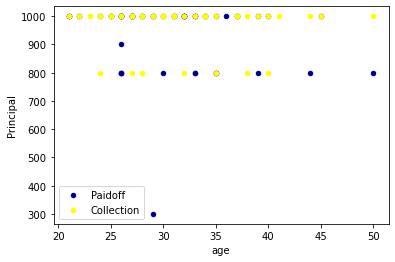

In [92]:
ax = df[df['loan_status'] == 'PAIDOFF'][0:50].plot(kind='scatter', x='age', y='Principal', color='DarkBlue', label='Paidoff');
df[df['loan_status'] == 'COLLECTION'][0:50].plot(kind='scatter', x='age', y='Principal', color='Yellow', label='Collection', ax=ax);
plt.show()

In [94]:
import pandas as pd 
file_handler = open("/Users/loay/desktop/career resources/Data for projects/Loan default and payment/loan_train.csv", 'r')
mydata = pd.read_csv(file_handler, sep = ",") 
file_handler.close() 
gender = {'male': 1,'female': 2} 
mydata.Gender = [gender[item] for item in mydata.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
mydata.loan_status = [loanstatus[item] for item in mydata.loan_status] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
mydata.education = [education1[item] for item in mydata.education]
print(mydata) 

     Unnamed: 0  Unnamed: 0.1  loan_status  Principal  terms effective_date  \
0             0             0            1       1000     30       9/8/2016   
1             2             2            1       1000     30       9/8/2016   
2             3             3            1       1000     15       9/8/2016   
3             4             4            1       1000     30       9/9/2016   
4             6             6            1       1000     30       9/9/2016   
..          ...           ...          ...        ...    ...            ...   
341         394           394            2        800     15      9/11/2016   
342         395           395            2       1000     30      9/11/2016   
343         397           397            2        800     15      9/12/2016   
344         398           398            2       1000     30      9/12/2016   
345         399           399            2       1000     30      9/12/2016   

       due_date  age  education  Gender  
0     10/

In [95]:
mydata.drop(mydata.columns[[5,6]], axis=1, inplace=True)

In [96]:
mydata.dtypes

Unnamed: 0      int64
Unnamed: 0.1    int64
loan_status     int64
Principal       int64
terms           int64
age             int64
education       int64
Gender          int64
dtype: object

In [97]:
feature_df = mydata[['loan_status', 'Principal', 'terms', 'age', 'education', 'Gender']]
X = np.asarray(feature_df)
X[0:5]

array([[   1, 1000,   30,   45,    1,    1],
       [   1, 1000,   30,   33,    3,    2],
       [   1, 1000,   15,   27,    2,    1],
       [   1, 1000,   30,   28,    2,    2],
       [   1, 1000,   30,   29,    2,    1]])

In [98]:
mydata['loan_status'] = mydata['loan_status'].astype('int')
y = np.asarray(mydata['loan_status'])
y [0:5]

array([1, 1, 1, 1, 1])

In [99]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [100]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [101]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1])

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.79      1.00      0.88        55
           2       0.00      0.00      0.00        15

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[0 0]
 [0 0]]


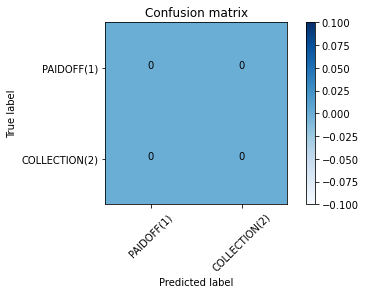

In [104]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(1)','COLLECTION(2)'],normalize= False,  title='Confusion matrix')

In [105]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6914285714285714

In [107]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.7857142857142857

In [110]:
import pandas as pd 
gender = {'male': 1,'female': 2} 
df = [gender[item] for item in df.Gender] 
loanstatus = {'PAIDOFF': 1,'COLLECTION': 2} 
df = [loanstatus[item] for item in df] 
education1 = {'High School or Below': 1, 'college': 2, 'Bechalor': 3, 'Master or Above': 4}
df = [education1[item] for item in df]
df.drop(df.columns[[5,6]], axis=1, inplace=True)
print(df)

KeyError: 0

In [ ]:
# ACCURACY SCORES 
# knn yhat = model_knn.predict(X_test)
yhat
print("Train set KNN Accuracy: ", metrics.accuracy_score(y, model_knn.predict(X)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat))
knn_jaccard = jaccard_similarity_score(y_test, yhat)
knn_f1_score = f1_score(y_test, yhat, average='weighted')

# Decission tree yhat = model_tree.predict(X_test)
yhat
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y, model_tree.predict(X)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat))
tree_jaccard = jaccard_similarity_score(y_test, yhat)
tree_f1_score = f1_score(y_test, yhat, average='weighted')

# SVM yhat = model_svm.predict(X_test)
yhat
print("Train set SVM Accuracy: ", metrics.accuracy_score(y, model_svm.predict(X)))
print("Test set SVM Accuracy: ", metrics.accuracy_score(y_test, yhat))
svm_jaccard = jaccard_similarity_score(y_test, yhat)
svm_f1_score = f1_score(y_test, yhat, average='weighted')

# Logistic regression yhat = model_lr.predict(X_test)
yhat_proba = model_lr.predict_proba(X_test)
yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y, model_lr.predict(X)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))
lr_jaccard = jaccard_similarity_score(y_test, yhat)
lr_f1_score = f1_score(y_test, yhat, average='weighted')
lr_log_loss = log_loss(y_test, yhat_proba)

In [ ]:
Train set KNN Accuracy:  0.806358381503
Test set KNN Accuracy:  0.685185185185
Train set Decission Tree Accuracy:  0.751445086705
Test set Decission Tree Accuracy:  0.777777777778
Train set SVM Accuracy:  0.751445086705
Test set SVM Accuracy:  0.740740740741
Train set Logistic regression Accuracy:  0.745664739884
Test set Logistic regression Accuracy:  0.75925925925